# Assignment Four
---
Oisín Morrison - 07/11/19 - Hw4.ipynb

---

This assignment is in relation to the investigation of solutions to Schrodinger's equation for an electron in a box. The specific tasks are explained below.

In [1]:
#standard imports for data science with python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## Task One


For an infinite potential well $\operatorname{V}(x) = 0$ for $|x| ≤ a$ and infinity otherwise. Numerically, we simply make $V$ very large, say $10^6$eV at the edges of the box.
Boundary conditions: in this case, the solution ψ must disappear at the edges of the box, $x = ±a$. i.e. $ψ(−a) = ψ(a) = 0$. At the centre, $x = 0$, there are two possibilities giving two familes of solution, ODD and EVEN.


Calculate the ground state, EVEN solution. For this, adopt $ψ(0) = 1$ and $\frac{dψ}{dx} = 0$, and $ψ(−a) = ψ(a) = 0$.
This is a boundary value problem. We are trying to find the shape of the solution, and the energy level, $E$. To proceed, we start at the centre with a guess for E (looking at the equation, E = 1/26.2 = 0.04 might be a good guess). We solve using Euler’s method, Euler-Cromer, or best of all a fourth order Runge-Kutta solver.
Taking steps across the range, from $x = 0$ to $x = a$ we determine $ψ(a)$ numerically, and see if it equals our boundary value $ψ(a) = 0$. Systematically repeating this, determine the correct value for $E$ and then plot $ψ(x)$ against $x$, and the probablity distribution.

---

We have the following equation for an electron in a box size of 1mm (energy units in eV)::
$$\frac{d^2 \psi}{d x^2}=-26.2 \left(E-V\right)\operatorname{\psi}(x)$$
This is second order, which we can't solve outright numerically. Instead, we convert it to two first order equations which we can solve as below:
$$\frac{d \psi}{dx}=\varepsilon=\operatorname{f_1}\left(x, \psi, \varepsilon\right)$$
$$\frac{d \varepsilon}{dx}=-26.2 \left(E-V\right) \operatorname{\psi}(x)=\operatorname{f_2}\left(x, \psi, \varepsilon\right)$$
We are then told that $\operatorname{\psi}(0)=1$, $\operatorname{\varepsilon}(0)=\operatorname{\frac{d \psi}{dx}}(0)=0$ and $\operatorname{\psi}(-a)=\operatorname{\psi}(a)=0$, and that $a=5\times10^{-10}$m.

This is a difficult task. To do this, I shall use a fourth order Runge-Kutta solver since this is the better method of solving ODEs numerically. This method will work as follows for our equations:
$$\psi_{i+1}=\psi_i+\frac{1}{6}\left(k_{1a}+2k_{2a}+2k_{3a}+k_{4a}\right)$$
$$\varepsilon_{i+1}=\varepsilon_i+\frac{1}{6}\left(k_{1b}+2k_{2b}+2k_{3b}+k_{4b}\right)$$
where
$$k_{1a}=h\operatorname{f_1}\left(x_i, \psi_i, \varepsilon_i\right)=\varepsilon_i$$
$$k_{2a}=h\operatorname{f_1}\left(x_i+\frac{h}{2}, \psi_i+\frac{ k_{1a}}{2}, \varepsilon_i+\frac{ k_{1b}}{2}\right)$$
$$k_{3a}=h\operatorname{f_1}\left(x_i+\frac{h}{2}, \psi_i+\frac{ k_{2a}}{2}, \varepsilon_i+\frac{ k_{2b}}{2}\right)$$
$$k_{4a}=h\operatorname{f_1}\left(x_i+h, \psi_i+ k_{3a}, \varepsilon_i+ k_{3b}\right)$$

and

$$k_{1b}=h\operatorname{f_2}\left(x_i, \psi_i, \varepsilon_i\right)=-26.2\left(E-V\right)\psi_i$$
$$k_{2b}=h\operatorname{f_2}\left(x_i+\frac{h}{2}, \psi_i+\frac{ k_{1a}}{2}, \varepsilon_i+\frac{ k_{1b}}{2}\right)$$
$$k_{3b}=h\operatorname{f_2}\left(x_i+\frac{h}{2}, \psi_i+\frac{ k_{2a}}{2}, \varepsilon_i+\frac{ k_{2b}}{2}\right)$$
$$k_{4b}=h\operatorname{f_2}\left(x_i+h, \psi_i+ k_{3a}, \varepsilon_i+ k_{3b}\right)$$.

$h$ is simply the step size, which will determine the accuracy of our solution. In my actual code, I shall define an $f_3=\left(E-V\right) f_2$ for convenience.

We are asked to calculate the ground state even solution in the well by varying $E$ and letting $V=0$ in our approximate solution until $\operatorname{\psi}(a)=0$. Then we are asked to plot $\operatorname{\psi}(x)$ against $x$ as well as the probability distribution.

So, in short, here is how I shall tackle this task:
- I shall quickly define my two two functions $f_1$ and $f_3$ as defined above for use in my Runge-Kutta method.
- I shall implement this Runge-Kutta method in a function *RK4_Solver* which will take initial conditions as inputs, as well as functions $f_1$, $f_3$, the number of steps, the range of x, and both $E$ and $V$. This function will return arrays of my $x$, $\psi$ and $eps$ values.
- I shall test this function out to see if it matches some known solutions.
- I shall then try out some $E$ values for our given $a$ (using my function defined above). I shall go from $x=0$ to $x=a$. We are told $E \approx 0.04$J $\approx 2.4966\times10^{17}$ is a good guess. With this in mind, I shall try $10^{17}$, $10^{17.5}$ and $10^{18}$. I shall plot $\psi$ against $x$ see how these graphs look and from there narrow down my E value until I get $\operatorname{\psi}(a) \approx 0$.
- Once I have this $E$, I shall plot my $\psi$ fully. To do this, I shall have to do four function calls - one to plot from $x=0$ to $x=a$, one to plot from $x=-a$ to $x=0$, one to plot for $x>a$ and the last one for $x>a$. For these $x>a$ and $x>a$ plots i.e. for $\psi$ outside the well, we know $V \to \infty$. To simulate this, I shall just take V to be a large number far larger than E. I'll add the well walls to the plot too, and label it suitably as normal.
- I shall then find the probability distribution by simply squaring my $\psi$ function above. I shall normalise it too, and add walls to my plot. I shall also label it and et cetera.


In [2]:
#defining the f1 and f3 functions as detailed above for use in my Runge-Kutte method
def f_1(x, psi, eps):
    """This function returns the value of the third input"""
    return eps

def f_3(x, psi, eps):
    """This function returns the value of the second input times -26.2"""
    return -26.2*psi

In [3]:
#making my Runge-Kutte method function here
def RK4_Solver(steps, E, V, psi_0, dpsi_dx_0, f1, f3, maxi, x_0=0):
    """This function solves Scrodinger's equation for an electron in a box when given a number of steps, initial values and problem data as well as the range to solve in"""
    h=(maxi-x_0)/steps #finding step size
    psi, eps, x=np.zeros(steps+1), np.zeros(steps+1), np.zeros(steps+1) #initialsing my arrays that I want to return
    x[0], psi[0], eps[0]=x_0, psi_0, dpsi_dx_0 #setting initial values
    const=E-V #defining this for ease
    
    #defining my f2 from my f3 as I said I was going to do.
    #I've done this since I want my RK4_Solver to be able to take both E and V inputs.
    def f_2(x, psi, eps):
        """returns the value of -26.2(E-V)*psi"""
        return const*f3(x, psi, eps)
    
    for i in range(steps): #for each step
        #find all my constants as required for the Runge-Kutte method
        k1a=h*f1(x[i], psi[i], eps[i]) #as defined in my markdown
        k1b=h*f_2(x[i], psi[i], eps[i]) #as defined in my markdown
        k2a=h*f1(x[i]+0.5*h, psi[i]+0.5*k1a, eps[i]+0.5*k1b) #as defined in my markdown
        k2b=h*f_2(x[i]+0.5*h, psi[i]+0.5*k1a, eps[i]+0.5*k1b) #as defined in my markdown
        k3a=h*f1(x[i]+0.5*h, psi[i]+0.5*k2a, eps[i]+0.5*k2b) #as defined in my markdown
        k3b=h*f_2(x[i]+0.5*h, psi[i]+0.5*k2a, eps[i]+0.5*k2b) #as defined in my markdown
        k4a=h*f1(x[i]+h, psi[i]+k3a, eps[i]+k3b) #as defined in my markdown
        k4b=h*f_2(x[i]+h, psi[i]+k3a, eps[i]+k3b) #as defined in my markdown
        
        x[i+1]=x[i]+h #increment our x by the step size
        psi[i+1]=psi[i]+(1/6)*(k1a+2*k2a+2*k3a+k4a) #as defined in my markdown
        eps[i+1]=eps[i]+(1/6)*(k1b+2*k2b+2*k3b+k4b) #as defined in my markdown
        
    return x, psi, eps #return the solutions I have found

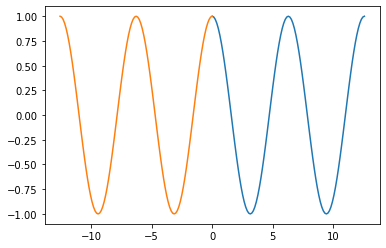

In [285]:
#If I take E-V=1/26.2, this would mean I am solving for a function who's second derivative is minus itself.
#So, I should get cos or sin of x.
#Taking psi(0)=1, I should get cos(x).
#I want to verify that my function does work by checking this.
a1,b1,c1=RK4_Solver(100, 1/26.2, 0, 1, 0, f_1, f_3, 4*np.pi) #solving from 0 to 4pi so I can see multiple periods
a2,b2,c2=RK4_Solver(100, 1/26.2, 0, 1, 0, f_1, f_3, -4*np.pi) #see if solving the other side works too
plt.plot(a1,b1)
plt.plot(a2,b2)

#This was a check, I'm not going to label this graph since I'm not presenting it any meaningful way. 
#This is just a check. I'll label the graphs we care about suitably.

We indeed see that this is $\operatorname{cos}(x)$, so our function does appear to be working. So, let's do the actual problem at hand.

In [286]:
L=0.5*10**-9 #This is the a value we are given i.e. half the box width

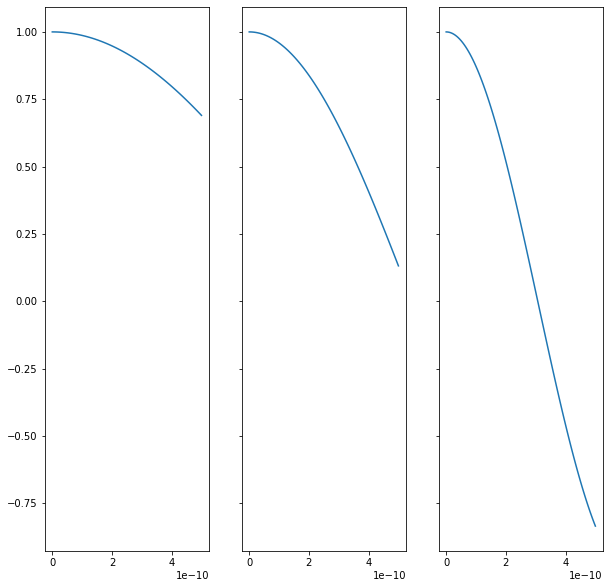

In [287]:
#Let's try E=10**17, 10**17.5 and 10**18 as we said we would. V=0 since we're looking at inside the well.

a1,b1,c1=RK4_Solver(100, 10**17, 0, 1, 0, f_1, f_3, L) #See if we go to zero at L, so I'm plotting from 0 to L
a2,b2,c2=RK4_Solver(100, 10**17.5, 0, 1, 0, f_1, f_3, L) #See if we go to zero at L, so I'm plotting from 0 to L
a3,b3,c3=RK4_Solver(100, 10**18, 0, 1, 0, f_1, f_3, L) #See if we go to zero at L, so I'm plotting from 0 to L
fig, ax=plt.subplots(1,3, figsize=(10,10), sharey=True, sharex=True) #some formatting, very unnecessary since I'm not presenting this
ax[0].plot(a1,b1) #plot the graphs
ax[1].plot(a2,b2) #plot the graphs
ax[2].plot(a3,b3) #plot the graphs

In [288]:
#So we see from above that it's somewhere between 10**17.5 and 10**18
#To this end, I'll try and pinpoint it.

psi_a1=np.inf #initial guess I'm making sure can't be right
for i in range(10000): #for a lot of times
    a,b,c=RK4_Solver(100, 10**(17.5+i/20000), 0, 1, 0, f_1, f_3, L) #solve with a different E between 10**17.5 and 10**18
    if abs(b[-1])<abs(psi_a1): #if this energy value is more accurate that any of the other so far i.e. it makes psi go to zero at L
        psi_a1=b[-1] #then store the value of psi at a to check against the next energies in the loop
        x1, psi1, eps1 = a,b,c #store our arrays for plotting
        E1=10**(17.5+i/20000) #store our energy

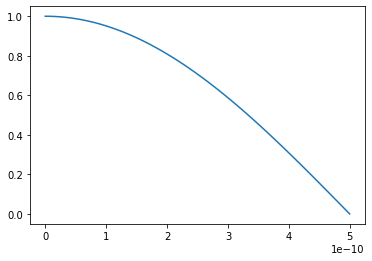

In [289]:
plt.plot(x1, psi1) #simple plot of our arrays to see if it looks OK

In [290]:
print(psi_a1) #checking we are indeed getting psi at a to be about 0
print(E1) #checking what our energy is like

-2.7949393825686675e-06
3.767037989839093e+17


In [291]:
#same method as just above, I'm seeing if I can narrow down my value even further.

E=0
psi_a=np.inf
for i in range(10000):
    a,b,c=RK4_Solver(100, E1-10**8+i*2*10**8, 0, 1, 0, f_1, f_3, L)
    if abs(b[-1])<abs(psi_a):
        psi_a=b[-1]
        x,psi,eps=a,b,c
        E=E1-10**8+i*2*10**8

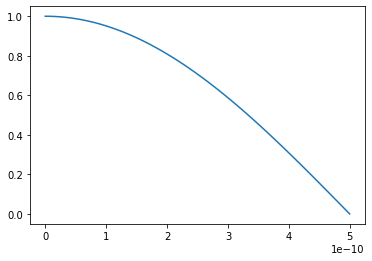

In [292]:
plt.plot(x, psi) #checking if it's any different

In [293]:
print(psi_a) #check if we're any closer to zero
print(E) #check energy value

-2.7947308895610867e-06
3.767037988839093e+17


So my narrowing down didn't achieve much or anything. Our values for $\operatorname{\psi}(a)$ are pretty much the exact same (the same to 4 figures). Likewise, our energy has also hardly changed. So, I see very little point in continuing to narrow it down further. I shall thus continue on to plot my functions.

In [294]:
a1,b1,c1=RK4_Solver(100, E, 0, 1, 0, f_1, f_3, L) #as before
a2,b2,c2=RK4_Solver(100, E, 0, 1, 0, f_1, f_3, -L) #as before
a3,b3,c3=RK4_Solver(100, E, 10**8, 0, 0, f_1, f_3, 3*-L,-L) #10**8 plays the role of infinity for our purposes
a4,b4,c4=RK4_Solver(100, E, 10**8, 0, 0, f_1, f_3, 3*L,L) #10**8 plays the role of infinity for our purposes

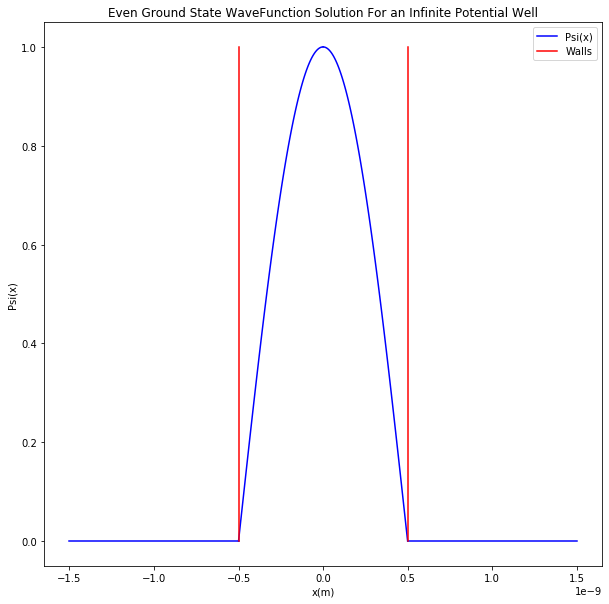

In [295]:
fig,ax=plt.subplots(figsize=(10,10)) #standard initialising

#plot my psi function
ax.plot(a1, b1, 'b-', label='Psi(x)') #only need to label one of them since they're all the same colour
ax.plot(a2, b2, 'b-')
ax.plot(a3,b3, 'b-')
ax.plot(a4,b4, 'b-')

#plot the walls
ax.plot(np.ones(500)*-L, np.linspace(min(b1),max(b1),500), 'r-', label='Walls') #only need to label one of them since they're all the same colour
ax.plot(np.ones(500)*L, np.linspace(min(b1),max(b1),500), 'r-')

ax.set(xlabel='x(m)', ylabel='Psi(x)') #labelling
ax.set_title("Even Ground State WaveFunction Solution For an Infinite Potential Well") #labelling
ax.legend() #labelling

#This looked good to me, so I left it alone after.

The probability function we know to be given by:
$$ \operatorname{P}(x)=\operatorname{\psi}(x) \operatorname{\psi *}(x)$$
We have a real-valued function $\operatorname{\psi}(x)$, so we can simply just square it and that is precisely what I shall do.

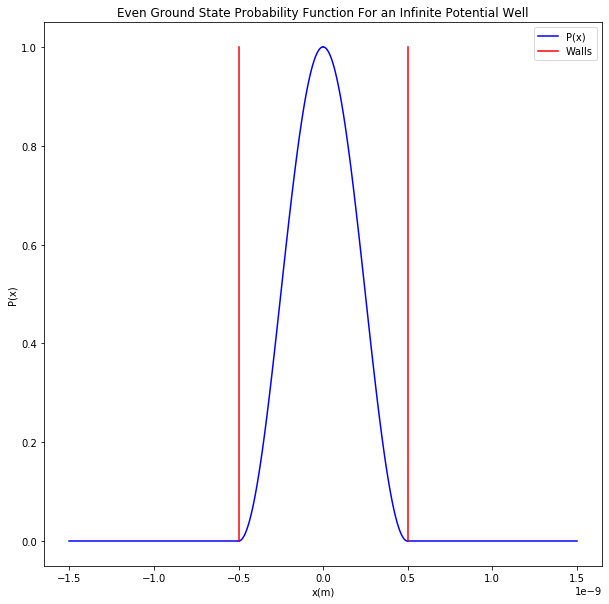

In [296]:
fig,ax=plt.subplots(figsize=(10,10)) #standard initialising

#plot my probability function
ax.plot(a1, np.array(b1)**2, 'b-', label='P(x)') #only need to label one of them since they're all the same colour
ax.plot(a2, np.array(b2)**2, 'b-') #only need to label one of them since they're all the same colour
ax.plot(a3,np.array(b3)**2, 'b-') #only need to label one of them since they're all the same colour
ax.plot(a4,np.array(b4)**2, 'b-') #only need to label one of them since they're all the same colour

#plot the walls
ax.plot(np.ones(500)*-L, np.linspace(0,max(np.array(b1)**2),500), 'r-', label='Walls') #only need to label one of them since they're all the same colour
ax.plot(np.ones(500)*L, np.linspace(0,max(np.array(b1)**2),500), 'r-')

ax.set(xlabel='x(m)', ylabel='P(x)') #labelling
ax.set_title("Even Ground State Probability Function For an Infinite Potential Well") #labelling
ax.legend() #labelling

#This looked good to me, so I left it alone after.

This is not normalised, so I shall do that below.

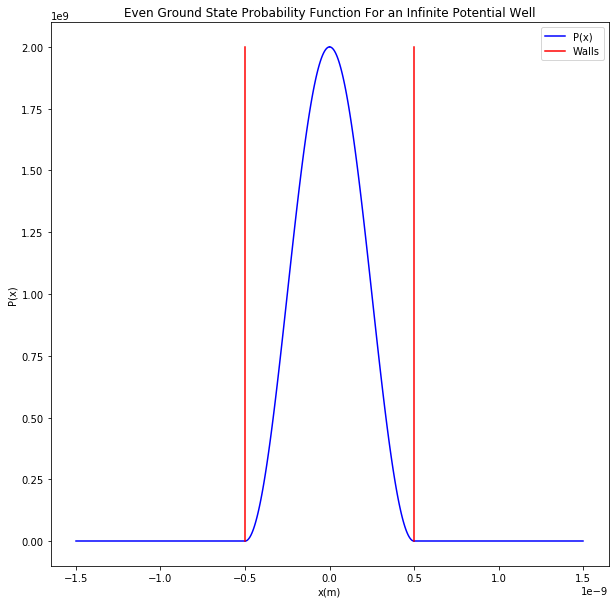

In [297]:
#find normalisation constant
normalise=1/(abs(scipy.integrate.simps(np.array(b1)**2, a1))+abs(scipy.integrate.simps(np.array(b2)**2, a2)))

fig,ax=plt.subplots(figsize=(10,10)) #standard initialising

#plot my probability function
ax.plot(a1, np.array(b1)**2*normalise, 'b-', label='P(x)') #only need to label one of them since they're all the same colour
ax.plot(a2, np.array(b2)**2*normalise, 'b-') #only need to label one of them since they're all the same colour
ax.plot(a3,np.array(b3)**2*normalise, 'b-') #only need to label one of them since they're all the same colour
ax.plot(a4,np.array(b4)**2*normalise, 'b-') #only need to label one of them since they're all the same colour

#plot the walls
ax.plot(np.ones(500)*-L, np.linspace(0,max(np.array(b1)**2*normalise),500), 'r-', label='Walls') #only need to label one of them since they're all the same colour
ax.plot(np.ones(500)*L, np.linspace(0,max(np.array(b1)**2*normalise),500), 'r-')

ax.set(xlabel='x(m)', ylabel='P(x)') #labelling
ax.set_title("Even Ground State Probability Function For an Infinite Potential Well") #labelling
ax.legend() #labelling

#This looked good to me, so I left it alone after.

This goes far above 100% which does not seem quite right. However, we are only asked for the probability distribution, and this is indeed the shape of the probably distribution so I leave this task as completed and move onto the second one.

## Task Two

Similarly, calculate the first ODD solution, and plot as before. Go on
to calculate the first two EVEN solutions, and the first two ODD solutions and
hence plot the first four wavefunctions and probablity distributions, labelling them
with their energy. Determine the relationship between energy and n, the quantum
number denoting the energy level.

So, this is essentially a continuation of Task One. As a result I shall carry on much the same as before.

- The first energy was about $10^{17.5}$eV, so I shall guess the next solution will have energy around this. So, I shall try values of $10^{18}$, $10^{18.5}$ and $10^{19}$ in my function. I'll see how those plots look and narrow down from there. I know the second solution will be odd, so I shall be conscious of this by making my initial $\psi$ value be 0.
- Once I have the first odd state, I shall move onto the second even state in the same manner described above.
- After that I shall do the same for the second odd state.
- Once I have all of these states, I shall plot them together.
- I shall then plot their probability distributions together too.
- Finally, I shall examine the relationship between energy and quantum number.

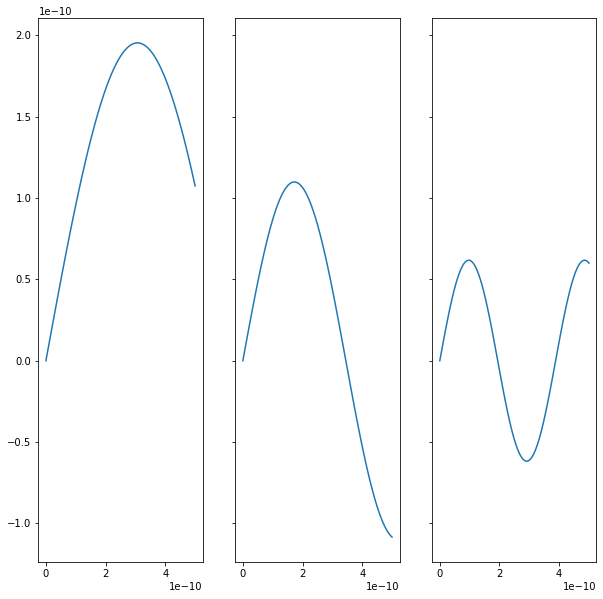

In [298]:
#Guessing E=10**18, 10**18.5 and 10**19.
#Same method as I did in Task One, no need to repeat myself
#Only difference is now psi(0)=0, not 1, since we're finding an odd solution.

a,b,c=RK4_Solver(100, 10**18, 0, 0, 1, f_1, f_3, L)
a2,b2,c2=RK4_Solver(100, 10**18.5, 0, 0, 1, f_1, f_3, L)
a3,b3,c3=RK4_Solver(100, 10**19, 0, 0, 1, f_1, f_3, L)
fig, ax=plt.subplots(1,3, figsize=(10,10), sharey=True, sharex=True)
ax[0].plot(a,b)
ax[1].plot(a2,b2)
ax[2].plot(a3,b3)

In [299]:
#so we see it's somewhere between 10**18 and 10**18.5

#Let's try to narrow in on it. Again, same method as in Task One so I won't repeat what I said.
E1=0
psi_a1=np.inf
for i in range(10000):
    a,b,c=RK4_Solver(100, 10**(18+i/20000), 0, 0, 1, f_1, f_3, L)
    if abs(b[-1])<abs(psi_a1):
        psi_a1=b[-1]
        x1, psi1, eps1 = a,b,c
        E1=10**(18+i/20000)

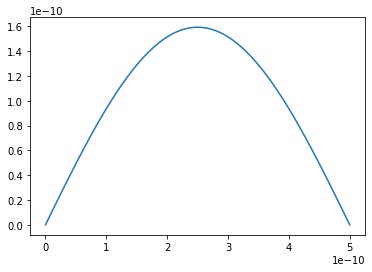

In [300]:
plt.plot(x1, psi1) #check plot is OK

In [301]:
print(psi_a1) #check psi(a)
print(E1) #check energy

4.865641767758868e-15
1.5067805307205478e+18


We see this $\operatorname{\psi}(a)$ is very close to zero already, so there is no need for further narrowing in.

In [302]:
#I'm going to plot this to make sure it looks OK
#So, I have to obtain all my pieces of psi

a1,b1,c1=RK4_Solver(100, E1, 0, 0, 1, f_1, f_3, L) #right side of well
a2,b2,c2=RK4_Solver(100, E1, 0, 0, 1, f_1, f_3, -L) #left side of well
a3,b3,c3=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*-L,-L) #left side outside well
a4,b4,c4=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*L,L) #right side outside well

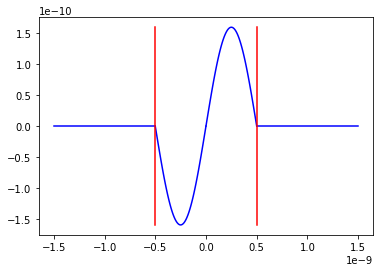

In [303]:
#I'm plotting this properly later with the other four, so i'm only doing a small bit of formatting
#I won't bother with labelling etc. since I'll do that later

#plot psi
plt.plot(a1, b1, 'b-')
plt.plot(a2, b2, 'b-')
plt.plot(a3,b3, 'b-')
plt.plot(a4,b4, 'b-')

#plot walls
plt.plot(np.ones(500)*-L, np.linspace(min(b2), max(b1),500), 'r-')
plt.plot(np.ones(500)*L, np.linspace(min(b2), max(b1),500), 'r-')

#We see the plot does indeed look as expected

Good job we checked this. We see that it is the right shape, but it does not peak at 1. We clearly see from our equation that if $\psi$ is a solution, then so is $\alpha \psi$, where $\alpha$ is an arbitrary constant. So, I shall simply multiply my solution by some constant so that it peaks at 1. I can actually change my initial values for $\varepsilon$ to accomplish this since we know the solution is $\psi=\operatorname{sin}(\beta x)$.
So, we see that $\varepsilon=\beta \operatorname{cos}(\beta x)$ and that $\operatorname{\varepsilon}(0)=\beta=\alpha$ i.e. our initial $\varepsilon$ is actually our scaling value.

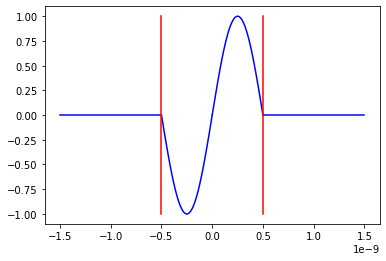

In [304]:
peak1=max(b1)

a1,b1,c1=RK4_Solver(100, E1, 0, 0, 1/peak1, f_1, f_3, L) #right side of well
a2,b2,c2=RK4_Solver(100, E1, 0, 0, 1/peak1, f_1, f_3, -L) #left side of well
a3,b3,c3=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*-L,-L) #left side outside well
a4,b4,c4=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*L,L) #right side outside well

#I'm plotting this properly later with the other four, so i'm only doing a small bit of formatting
#I won't bother with labelling etc. since I'll do that later

#plot psi
plt.plot(a1, b1, 'b-')
plt.plot(a2, b2, 'b-')
plt.plot(a3,b3, 'b-')
plt.plot(a4,b4, 'b-')

#plot walls
plt.plot(np.ones(500)*-L, np.linspace(min(b2), max(b1),500), 'r-')
plt.plot(np.ones(500)*L, np.linspace(min(b2), max(b1),500), 'r-')

#We see the plot does indeed look as expected

Perfect! Now, I shall also check that the probability distribtion looks OK.

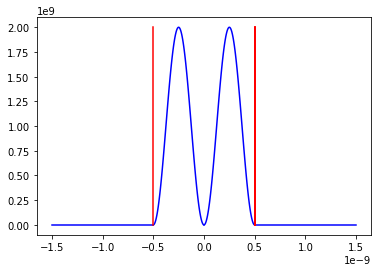

In [305]:
#Again, I'm plotting this properly later with the other four, so i'm only doing a small bit of formatting
#I won't bother with labelling etc. since I'll do that later

#find normalisation constant
normalise=1/(abs(scipy.integrate.simps(np.array(b1)**2, a1))+abs(scipy.integrate.simps(np.array(b2)**2, a2)))

#plot P(x)
plt.plot(a1, np.array(b1)**2*normalise, 'b-')
plt.plot(a2, np.array(b2)**2*normalise, 'b-')
plt.plot(a3,np.array(b3)**2*normalise, 'b-')
plt.plot(a4,np.array(b4)**2*normalise, 'b-')

#plot walls
plt.plot(np.ones(500)*-L, np.linspace(0,max(np.array(b1)**2*normalise),500), 'r-')
plt.plot(np.ones(500)*L, np.linspace(0,np.array(b1)**2*normalise,500), 'r-')

plt.show()

So, we have the first odd solution. Let's move onto finding the next solution - the second even one. The last solution occured at an energy of greater than $10**{18}$.  So, I shall try values of $10^{18.5}$, $10^{19}$ and $10^{19.5}$ in my function. I'll see how those plots look and narrow down from there. I know this solution will be even, so I shall be conscious of this by making my initial $\psi$ value be 1.

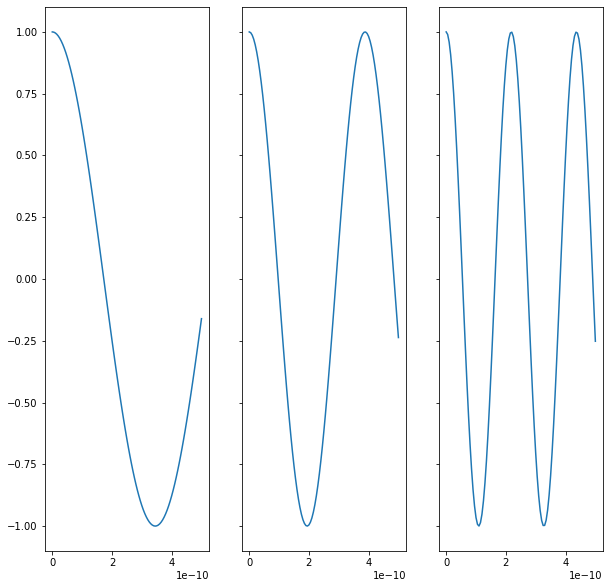

In [306]:
#Guessing E=10**18.5, 10**19 and 10**19.5
#...Same drill...

a,b,c=RK4_Solver(100, 10**18.5, 0, 1, 0, f_1, f_3, L)
a2,b2,c2=RK4_Solver(100, 10**19, 0, 1, 0, f_1, f_3, L)
a3,b3,c3=RK4_Solver(100, 10**19.5, 0, 1, 0, f_1, f_3, L)
fig, ax=plt.subplots(1,3, figsize=(10,10), sharey=True, sharex=True)
ax[0].plot(a,b)
ax[1].plot(a2,b2)
ax[2].plot(a3,b3)

In [307]:
#so it's somewhere between 10**18.5 and 10**19.
#Again let's try narrowing in as we have every time.
#Same method...

E1=0
psi_a1=np.inf
for i in range(10000):
    a,b,c=RK4_Solver(100, 10**(18.5+i/20000), 0, 1, 0, f_1, f_3, L)
    if abs(b[-1])<abs(psi_a1):
        psi_a1=b[-1]
        x1, psi1, eps1 = a,b,c
        E1=10**(18.5+i/20000)

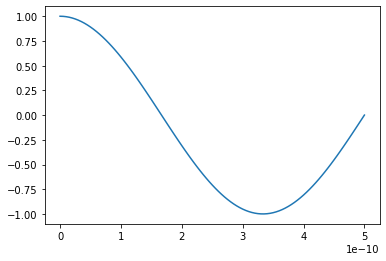

In [308]:
plt.plot(x1, psi1) #check plot is OK

In [309]:
print(psi_a1) #check psi(a)=0
print(E1) #check energy

4.883277210560033e-05
3.390392666668314e+18


That's accurate enough for our purposes.

So, we have the second even solution. Let's move onto finding the next solution - the second odd one. The last solution occured at an energy of about $10**{18}$eV.  So, I shall try values of $10^{18.5}$, $10^{19}$ and $10^{19.5}$ in my function. I'll see how those plots look and narrow down from there. I know this solution will be odd, so I shall be conscious of this by making my initial $\psi$ value be 0.

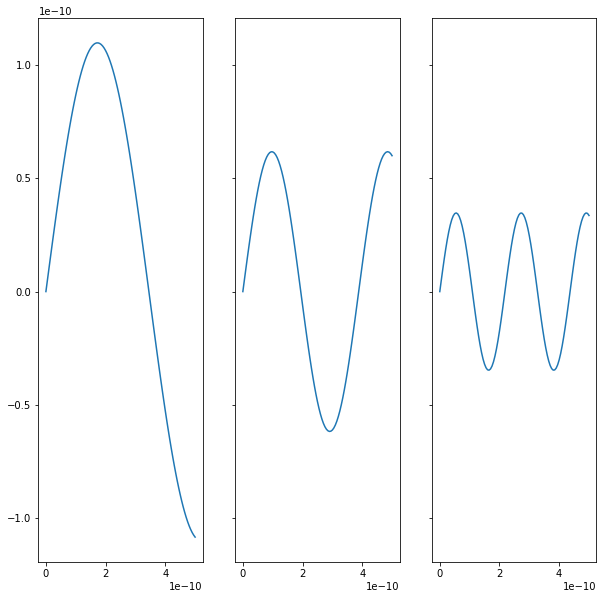

In [310]:
#Guessing E=10**18.5, 10**19 and 10**19.5
#...Same drill...

a,b,c=RK4_Solver(100, 10**18.5, 0, 0, 1, f_1, f_3, L)
a2,b2,c2=RK4_Solver(100, 10**19, 0, 0, 1, f_1, f_3, L)
a3,b3,c3=RK4_Solver(100, 10**19.5, 0, 0, 1, f_1, f_3, L)
fig, ax=plt.subplots(1,3, figsize=(10,10), sharey=True, sharex=True)
ax[0].plot(a,b)
ax[1].plot(a2,b2)
ax[2].plot(a3,b3)

In [311]:
#so it's somewhere between 10**18.5 and 10**19
#Let's close in...

E1=0
psi_a1=np.inf
for i in range(10000):
    a,b,c=RK4_Solver(100, 10**(18.5+i/20000), 0, 0, 1, f_1, f_3, L)
    if abs(b[-1])<abs(psi_a1):
        psi_a1=b[-1]
        x1, psi1, eps1 = a,b,c
        E1=10**(18.5+i/20000)

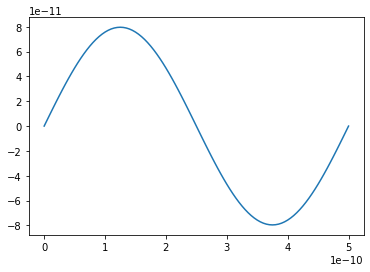

In [312]:
plt.plot(x1, psi1) #check graph

In [313]:
print(psi_a1) #check psi(a)
print(E1) #check energy

-1.0677986222368007e-14
6.026983465211863e+18


That's accurate enough for our purposes. We remember we need to change this graph to peak at one, so I shall make a variable I can call later here.

In [321]:
peak2=max(psi1) #here it is

Anyhow, so here's what we have:


| Solution | E | $\psi(a) \approx 0$ |
| --- | --- | --- |
| FIRST EVEN | 3.767037988839093e+17 | -2.7947308895610867e-06 |
| FIRST ODD | 1.5067805307205478e+18 | 4.865641767758868e-15 |
| SECOND EVEN | 3.390392666668314e+18 | 4.883277210560033e-05 |
| SECOND ODD | 6.026983465211863e+18 | -1.0677986222368007e-14 |

Let's plot our graphs.

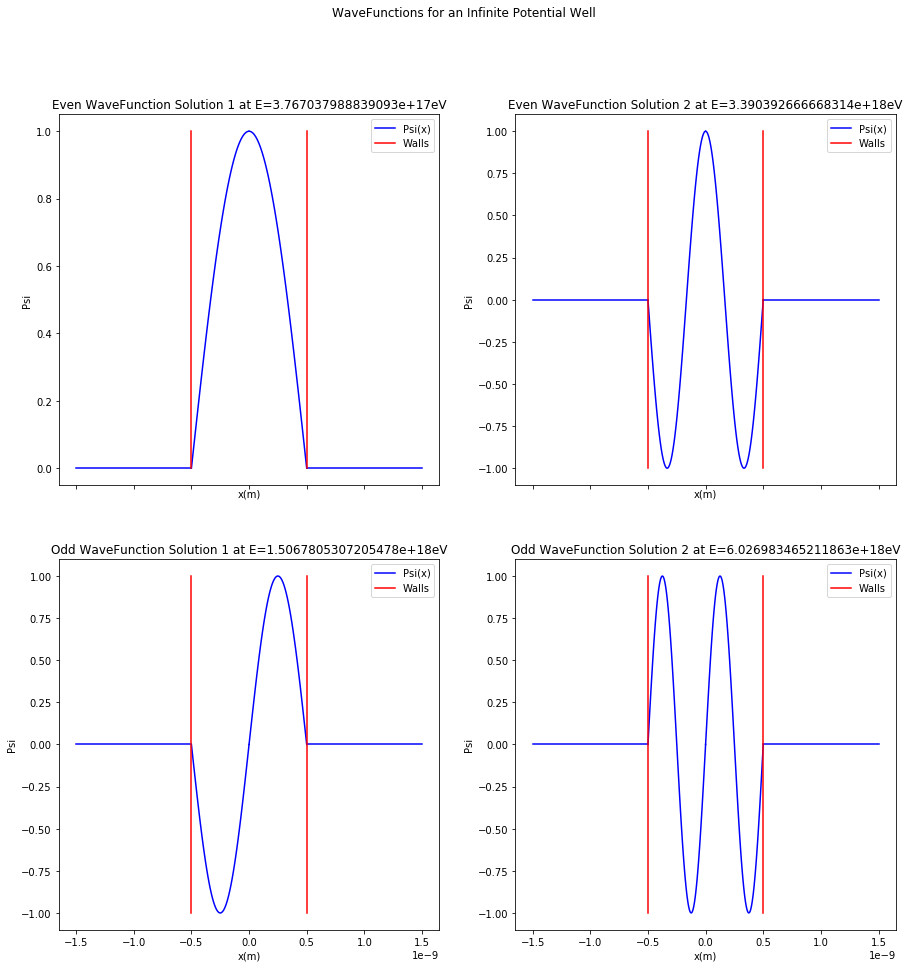

In [323]:
#Let's do the wavefunctions first

Even_Es=[3.767037988839093e+17, 3.390392666668314e+18] #Energies of even functions
Odd_Es=[1.5067805307205478e+18, 6.026983465211863e+18] #Energies of odd functions

fig, ax=plt.subplots(2,2, figsize=(15,15), sharex=True) #standard initialisation of plot

fig.suptitle("WaveFunctions for an Infinite Potential Well") #set master title

for i in range(2): #for each of the even solutions
    
    #find psi
    a1,b1,c1=RK4_Solver(100, Even_Es[i], 0, 1, 0, f_1, f_3, L) #right side of well
    a2,b2,c2=RK4_Solver(100, Even_Es[i], 0, 1, 0, f_1, f_3, -L) #left side of well
    a3,b3,c3=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*-L,-L) #right side outside well
    a4,b4,c4=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*L,L) #right side outside well
    
    #plot psi as normal
    ax[0][i].plot(a1, b1, 'b-', label="Psi(x)")
    ax[0][i].plot(a2, b2, 'b-')
    ax[0][i].plot(a3,b3, 'b-')
    ax[0][i].plot(a4,b4, 'b-')

    #plot walls as normal
    ax[0][i].plot(np.ones(500)*-L, np.linspace(min(b2), max(b1),500), 'r-', label="Walls")
    ax[0][i].plot(np.ones(500)*L, np.linspace(min(b2), max(b1),500), 'r-')
    
    ax[0][i].set_title("Even WaveFunction Solution {0} at E={1}eV".format(i+1, Even_Es[i])) #label with energy as asked to do so
    ax[0][i].set(xlabel="x(m)", ylabel='Psi') #label axes
    
    ax[0][i].legend()
    
for i in range(2): #for each of the odd solutions
    
    #get the peak so we can make sure they peak at 1
    if i==0:
        peak=peak1
    else:
        peak=peak2
      
    #find psi
    a1,b1,c1=RK4_Solver(100, Odd_Es[i], 0, 0, 1/peak, f_1, f_3, L) #right side of well
    a2,b2,c2=RK4_Solver(100, Odd_Es[i], 0, 0, 1/peak, f_1, f_3, -L) #left side of well
    a3,b3,c3=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*-L,-L) #right side outside well
    a4,b4,c4=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*L,L) #left side outside well
    
    #plot psi as normal
    ax[1][i].plot(a1, b1, 'b-', label="Psi(x)")
    ax[1][i].plot(a2, b2, 'b-')
    ax[1][i].plot(a3,b3, 'b-')
    ax[1][i].plot(a4,b4, 'b-')

    #plot walls as normal
    ax[1][i].plot(np.ones(500)*-L, np.linspace(min(b2), max(b1),500), 'r-', label="Walls")
    ax[1][i].plot(np.ones(500)*L, np.linspace(min(b2), max(b1),500), 'r-')
    
    ax[1][i].set_title("Odd WaveFunction Solution {0} at E={1}eV".format(i+1, Odd_Es[i])) #label with energy as asked to do so
    ax[1][i].set(xlabel="x(m)", ylabel='Psi') #label axes
    
    ax[1][i].legend()

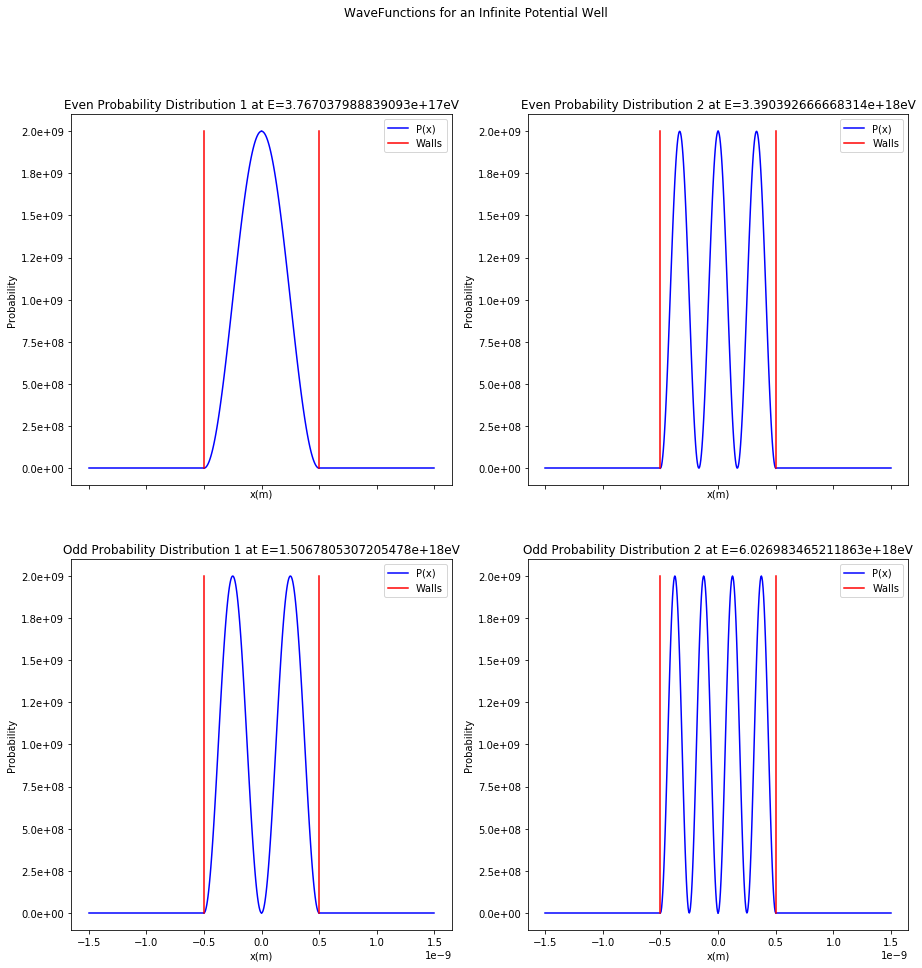

In [325]:
fig, ax=plt.subplots(2,2, figsize=(15,15), sharex=True) #standard initialisation of plot

fig.suptitle("WaveFunctions for an Infinite Potential Well") #set master title

#making sure axis ticks don't mess with titles
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax[1][0].yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax[1][1].yaxis.set_major_formatter(FormatStrFormatter('%.1e'))

for i in range(2): #for each of the even solutions
    
    #find psi
    a1,b1,c1=RK4_Solver(100, Even_Es[i], 0, 1, 0, f_1, f_3, L) #right side of well
    a2,b2,c2=RK4_Solver(100, Even_Es[i], 0, 1, 0, f_1, f_3, -L) #left side of well
    a3,b3,c3=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*-L,-L) #right side outside well
    a4,b4,c4=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*L,L) #left side outside well

    #find normalisation constant
    normalise=1/(abs(scipy.integrate.simps(np.array(b1)**2, a1))+abs(scipy.integrate.simps(np.array(b2)**2, a2)))
    
    #find P(x) and plot it
    ax[0][i].plot(a1, np.array(b1)**2*normalise, 'b-', label="P(x)")
    ax[0][i].plot(a2, np.array(b2)**2*normalise, 'b-')
    ax[0][i].plot(a3,np.array(b3)**2*normalise, 'b-')
    ax[0][i].plot(a4,np.array(b4)**2*normalise, 'b-')

    #plot walls as normal
    ax[0][i].plot(np.ones(500)*-L, np.linspace(0, max(np.array(b1)**2*normalise),500), 'r-', label="Walls")
    ax[0][i].plot(np.ones(500)*L, np.linspace(0, max(np.array(b1)**2*normalise),500), 'r-')
    
    ax[0][i].set_title("Even Probability Distribution {0} at E={1}eV".format(i+1, Even_Es[i])) #label with energy as asked to do so
    ax[0][i].set(xlabel="x(m)", ylabel='Probability') #label axes
    
    ax[0][i].legend()
    
for i in range(2): #for each of the odd solutions
    
    #find psi
    a1,b1,c1=RK4_Solver(100, Odd_Es[i], 0, 0, 1, f_1, f_3, L) #right side of well
    a2,b2,c2=RK4_Solver(100, Odd_Es[i], 0, 0, 1, f_1, f_3, -L) #left side of well
    a3,b3,c3=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*-L,-L) #right side outside well
    a4,b4,c4=RK4_Solver(100, 0, 10**10, 0, 0, f_1, f_3, 3*L,L) #left side outside well

    #find normalisation constant
    normalise=1/(abs(scipy.integrate.simps(np.array(b1)**2, a1))+abs(scipy.integrate.simps(np.array(b2)**2, a2)))
    
    #find P(x) and plot it
    ax[1][i].plot(a1, np.array(b1)**2*normalise, 'b-', label="P(x)")
    ax[1][i].plot(a2, np.array(b2)**2*normalise, 'b-')
    ax[1][i].plot(a3,np.array(b3)**2*normalise, 'b-')
    ax[1][i].plot(a4,np.array(b4)**2*normalise, 'b-')

    #plot walls as normal
    ax[1][i].plot(np.ones(500)*-L, np.linspace(0, max(np.array(b1)**2*normalise),500), 'r-', label='Walls')
    ax[1][i].plot(np.ones(500)*L, np.linspace(0, max(np.array(b1)**2*normalise),500), 'r-')
    
    ax[1][i].set_title("Odd Probability Distribution {0} at E={1}eV".format(i+1, Odd_Es[i])) #label with energy as asked to do so
    ax[1][i].set(xlabel="x(m)", ylabel='Probability') #label axes
    
    ax[1][i].legend()

Now, let's look at the relationship between the energies of our states and their quantum numbers. We start in the obvious way by plotting.

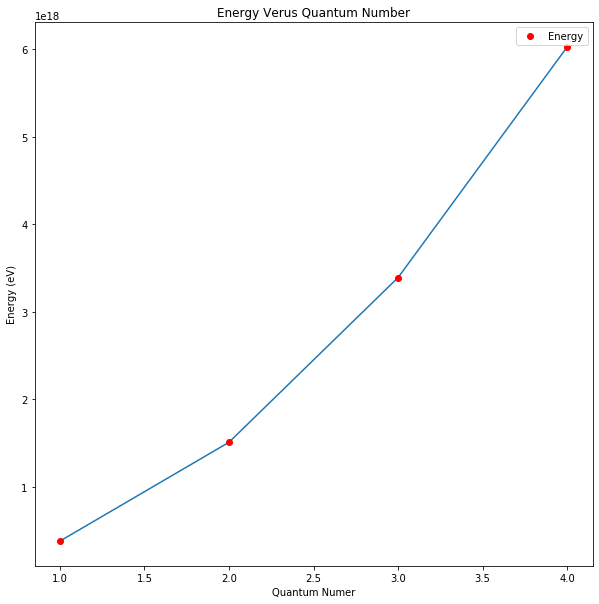

In [328]:
Energies=[3.767037988839093e+17, 1.5067805307205478e+18, 3.390392666668314e+18, 6.026983465211863e+18] #here's our energies we found as an array
ns=[1,2,3,4] #quantum numbers as array

fig, ax=plt.subplots(figsize=(10,10)) #standard initialisation
ax.plot(ns, Energies) #plot as a line
ax.plot(ns, Energies, 'ro', label="Energy") #plot as dots

ax.set_title("Energy Verus Quantum Number") #setting a title
ax.set(xlabel="Quantum Numer", ylabel='Energy (eV)') #labelling axes

ax.legend()

This looks quite a lot like the $E \propto n^2$ relation we expect. I shall check just how good it is by fitting a function $\operatorname{E}(n)=\alpha n^2$ to the graph. We can do this easily since we see that we should have $E_1=\alpha$.

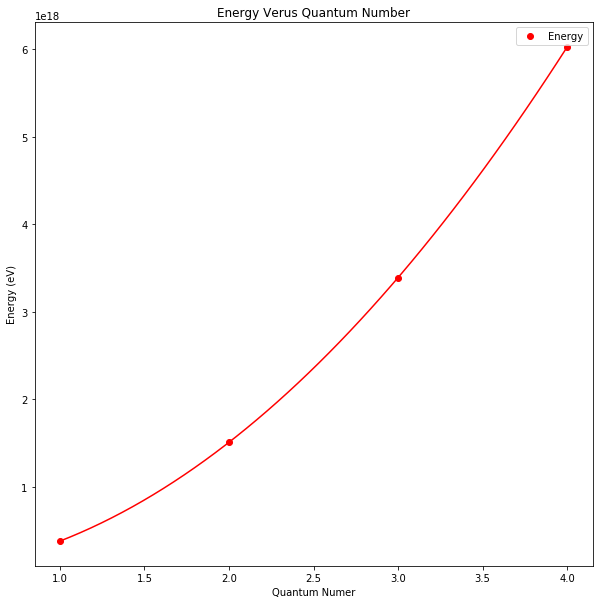

In [338]:
Energies=[3.767037988839093e+17, 1.5067805307205478e+18, 3.390392666668314e+18, 6.026983465211863e+18] #here's our energies we found as an array
ns=[1,2,3,4] #quantum numbers as array

fig, ax=plt.subplots(figsize=(10,10)) #standard initialisation

n= np.linspace(1,4) #making a linspace array to plot

ax.plot(n, Energies[0]*np.array(n)**2, 'r-') #plotting my n^2 model

ax.plot(ns, Energies, 'ro', label="Energy") #plot the actual points as red dots

ax.set_title("Energy Verus Quantum Number") #setting a title
ax.set(xlabel="Quantum Numer", ylabel='Energy (eV)') #labelling axes

ax.legend()

We see that all of the points lie on our model i.e. our model is a very good predictor of the data we have. Thus, it would be fair to conclude that we do indeed have the $E \propto n^2$ relation we expected. If this were an experiment and we were really interested in this relation, we would get more points since four is cutting it a bit short. However, since this is an idealised scenario where we define what happens with our code, we know that this relationship continues. As a result, I'm not going to get any more points than those I was asked to get for this task.

## Task 3

For a finite potential well, we take an example of $V = 1.0$ eV for $|x| > a$. This
time, we must solve the equation from the centre $x = 0$ to beyond the edge of the
zero potential part, i.e to beyond $x = a$. There is a new boundary condition, that
the derivative of the wavefunction must be continuous across the boundary.


Calculate the ground state, EVEN solution for this potential and plot
the wavefunction and probability distribution. Compare the energy of this state
to the ground state of the infinite potential well. Go off to calculate ODD solutions
and determine how many bound states the well can contain.

In short, we need both $\varepsilon$ and $\psi$ to be continuous.

This task is somewhat complicated. To execute it, I shall:
- See how my function behaves when $(E-V)$ is negative, similarly to how I did in Task One by plotting our solutions and comparing them to known ones. I took $a=1$ here so I could see what was happening easier.
- I actually found that this was giving me the wrong exponential solution i.e. there were two that satisfied the initial conditions and sadly it gave me the one I didn't want - I want $\psi$ to go to $0$ as $x \to \infty$ and this solution did not. So, since I know that the two possible solutions are $e^{\beta x}$ and $e^{-\beta x}$, I simply found the correct solution by taking 1 over what the function returned. This meant changing the initial conditions etc. in order to make sure differentiability and continuity for psi occured as required.
- Once I had this working, I tested my function out for $a=1$ to see if it gave what i expected.
- I then moved onto the given problem with $a=L$ I defined in my code. Since I know that the exponential solution only occurs when $(E-V)<0$, I tested out a load of values less than the potential outside the well, namely $V=1$eV to see what my function looked like.
- I then moved on to finding what the ground even solution for this potential looked like - plotting both it's wavefunction and probability distribution. I had some comments about this.
- I then went about looking for all the odd solutions and from that determined how many bound states the well contained.


In [69]:
#taking a E=0.5*V
E=1/2

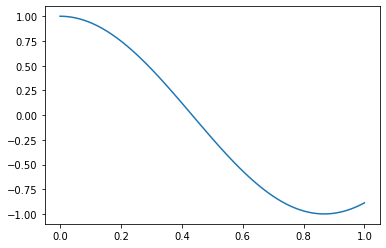

In [70]:
a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, 1) #find solution inside well as before
plt.plot(a1,b1) #plot normal solution inside well

#Not bothering for labels again, this is just for me to see what's going on

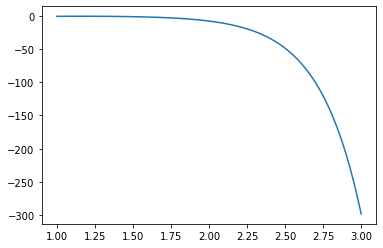

In [64]:
#That works fine

a2,b2,c2=RK4_Solver(100, E, 1, b1[-1], c1[-1], f_1, f_3, 3*1, 1) #look for a solution outside well so that it's continuous and differentiable at the boundary
plt.plot(a2,b2) #plot it

So, we have a problem. This goes off to infinity and isn't differentiable at the boundary. Unfortunately, it does satisfy all the initial conditions i.e. it is a perfectly valid answer to the question we asked of our Runge-Kutte method and our code isn't what the problem is here. As with all programming problems, a good underlying knowledge of the mechanics of what we are trying to model will help us greatly. To get around this issue, I shall make use of the fact that I know $e^{\beta x}$ and $e^{-\beta x}$ are the two solutions so that if I plot 1 over what the function returned I should see my exponential drop toward 0 as $x \to \infty$ as we want.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


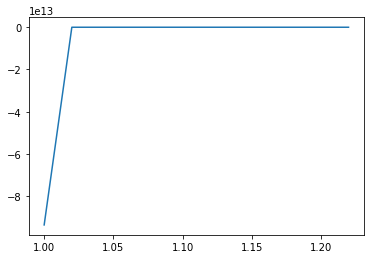

In [339]:
a2,b2,c2=RK4_Solver(100, E, 1, b1[-1], c1[-1], f_1, f_3, 3*1, 1) #solving as before
plt.plot(a2,1/b2) #plot it

So, now we have a new problem. Our trick worked, but we have to change our initial conditions. We know that $\operatorname{\psi}(a)=$b1[-1] in our code and that $\operatorname{\varepsilon}(a)=$c1[-1]. So, when we are considering outisde the box, we need our inital value for the slope of 1 over what our *RK4_Solver* gives to be c1[-1] and the initial value of 1 over what our *RK4_Solver* gives to be b1[-1].

So, the first part of this is easy. We see that if we make our *RK4_Solver* function start at 1/b1[-1] then obviously 1 over our *RK4_Solver* function will be b1[-1] at $x=a$ as required. The next part isn't so easy. I shall make use of our knowledge of the type of solutions i.e. $e^{\beta x}$ and $e^{-\beta x}$. The solution that goes off to infinity i.e. that which our *RK4_Solver* returns is $e^{\beta x}$. So, we're looking for a value for $\frac{d\left(e^{\beta x}\right)}{dx}\left(a\right)$ such that it makes $\frac{d\left(e^{-\beta x}\right)}{dx}\left(a\right)=$c1[-1]. So, let's do this.
We have:
$$e^{-\beta a}=\text{b1[-1]}$$
$$\frac{d \left(e^{-\beta x}\right)}{dx}\left(a\right)=-\beta e^{-\beta a}=\text{c1[-1]}$$
$$\therefore \frac{d \left(e^{\beta x}\right)}{dx}\left(a\right)=\beta e^{\beta a}=-\beta \frac{1}{\text{b1[-1]}}=-\frac{\text{c1[-1]}}{\text{b1[-1]}^2}$$

Let's use this.

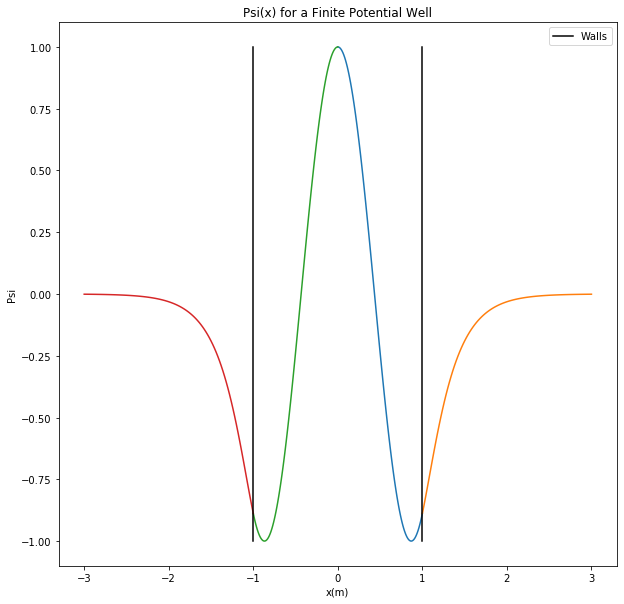

In [349]:
E=0.5 #E=V/2

plt.figure(figsize=(10,10)) #make bigger plot


plt.xlabel("x(m)") #labelling
plt.ylabel("Psi") #labelling

plt.title("Psi(x) for a Finite Potential Well") #labelling

#as normal for inside well
a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, 1)
plt.plot(a1,b1)

#outside well obtained using new initial conditions
a2,b2,c2=RK4_Solver(100, E, 1, 1/b1[-1], -(b1[-1])**-2*c1[-1], f_1, f_3, 3*1, 1)
plt.plot(a2,1/b2)

#as normal for inside well
a3,b3,c3=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, -1)
plt.plot(a3,b3)

#outside well obtained using new initial conditions
a4,b4,c4=RK4_Solver(100, E, 1, 1/b1[-1], (b1[-1])**-2*c1[-1], f_1, f_3, -3*1, -1)
plt.plot(a4,1/b4)

#plot walls
plt.plot(np.ones(100),np.linspace(-1,1,100), 'k-', label= 'Walls')
plt.plot(np.ones(100)*-1,np.linspace(-1,1,100), 'k-')

plt.legend()

We this plot is *exactly* as we expected, so we can be very happy this method does indeed work. I shall now try to apply this to our actual problem. We know that we only get graphs like this when $E$ is less than $V$, so I test out a range of values for $E$ than are less than 1 to see where our lowest energy solution is.

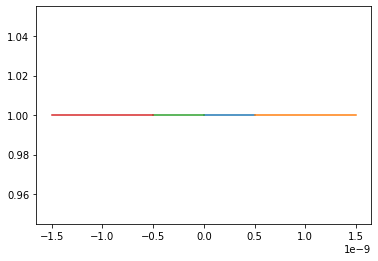

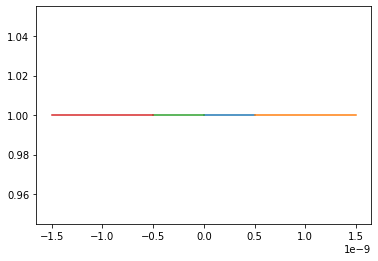

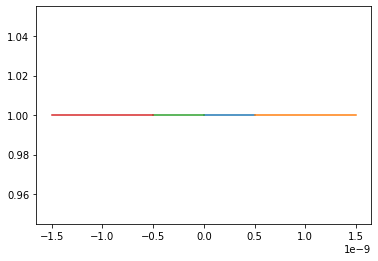

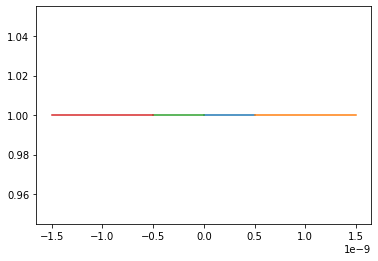

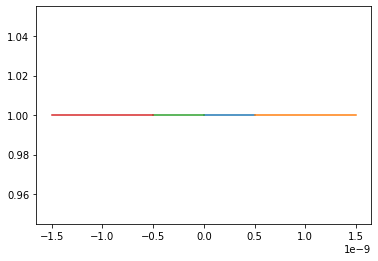

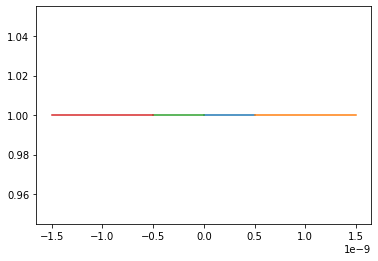

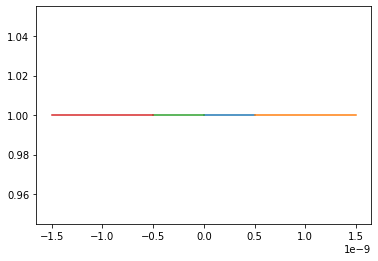

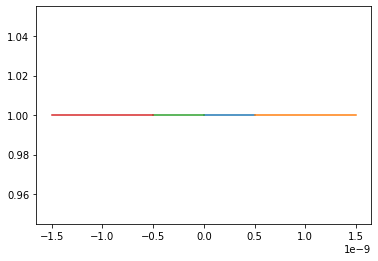

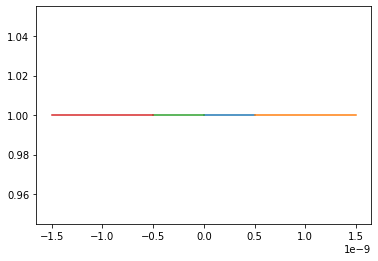

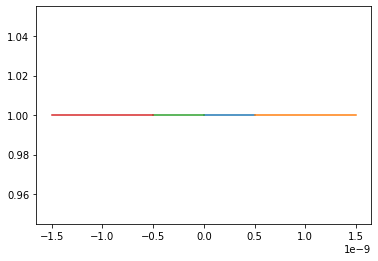

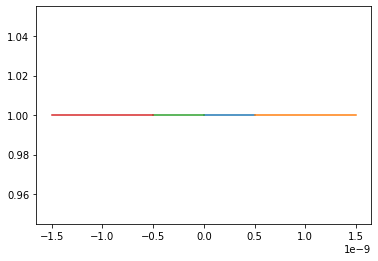

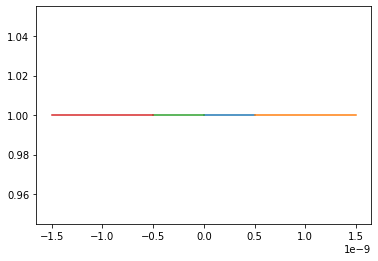

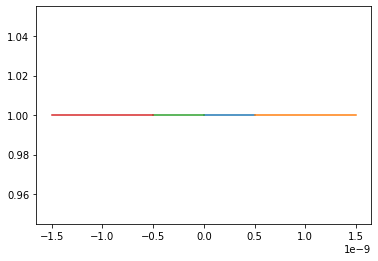

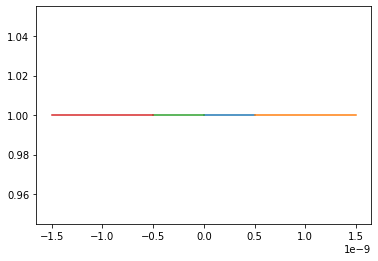

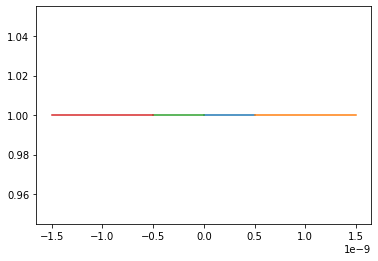

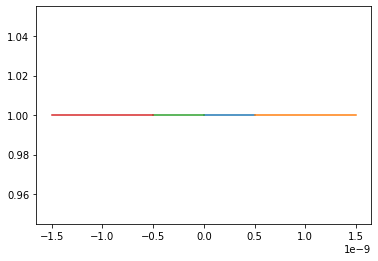

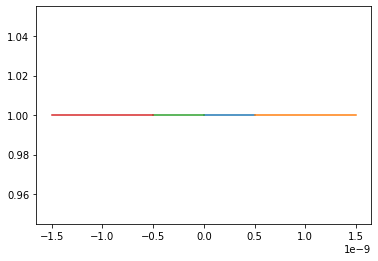

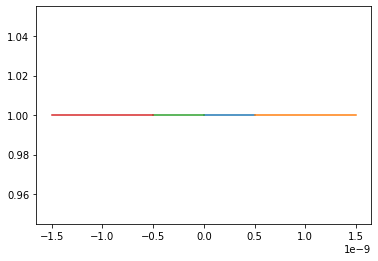

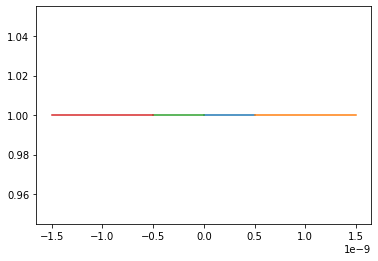

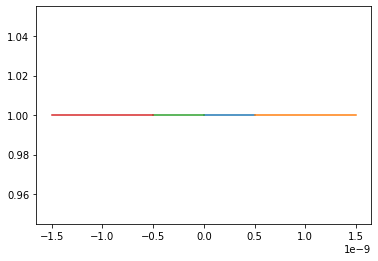

In [342]:
for i in np.logspace(0,1,20): #try 20 values less than one
    E=i #let that be the energy
    
    #solve inside well
    a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, L)
    plt.plot(a1,b1)

    #solve outside well
    a2,b2,c2=RK4_Solver(100, E, 1, 1/b1[-1], -(b1[-1])**-2*c1[-1], f_1, f_3, 3*L, L)
    plt.plot(a2,1/b2)

    #solve inside well
    a3,b3,c3=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, -L)
    plt.plot(a3,b3)

    #solve outside well
    a4,b4,c4=RK4_Solver(100, E, 1, 1/b1[-1], (b1[-1])**-2*c1[-1], f_1, f_3, -3*L, -L)
    plt.plot(a4,1/b4)
    
    #just show the graphs, no need for labelling etc.
    plt.show()

However, we get a surprising result. In fact, we don't have any non-trivial solutions as seen above for $E$ less than $V$. This does make sense considering that $E$ was about $10^{17}$ for the infinite potential well, so $V=1$ in comparison to that is so miniscule we may as well ignore it. In fact, I expect to see this behave like an infinitely wide potential well considering this. I'll see if my plots support this idea.

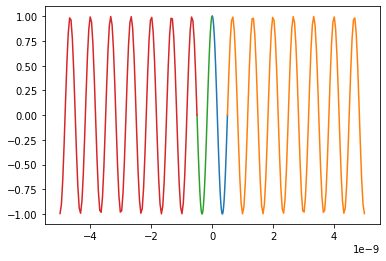

In [149]:
E=Even_Es[1] #first solution for infinite potential well's energy

#plot as normal since (E-V) is no longer less than zero..

a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, L)
plt.plot(a1,b1)

a2,b2,c2=RK4_Solver(100, E, 1, b1[-1], c1[-1], f_1, f_3, 10*L, L)
plt.plot(a2,b2)


a3,b3,c3=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, -L)
plt.plot(a3,b3)

a4,b4,c4=RK4_Solver(100, E, 1, b1[-1], -c1[-1], f_1, f_3, -10*L, -L)
plt.plot(a4,b4)

So, we see that we do indeed appear to have an infinitely wide potential well. This effectively means that any energy greater than 1 will yield an infinitely sinusoidal solution.

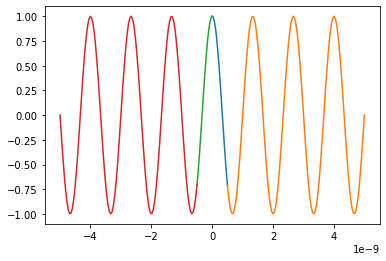

In [150]:
#try with smaller E to show we still get sinusoidal solution

E=E/4

a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, L)
plt.plot(a1,b1)

a2,b2,c2=RK4_Solver(100, E, 1, b1[-1], c1[-1], f_1, f_3, 10*L, L)
plt.plot(a2,b2)


a3,b3,c3=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, -L)
plt.plot(a3,b3)

a4,b4,c4=RK4_Solver(100, E, 1, b1[-1], -c1[-1], f_1, f_3, -10*L, -L)
plt.plot(a4,b4)

Now, we want the ground state. This doesn't really make much sense since any energy greater than 1 should work, so I'll just pick an energy closer to one to demonstrate this. It seems to me like the $V$ given was not meant to be as small as it is, so that we would see that falling off as in that plot I had previously.

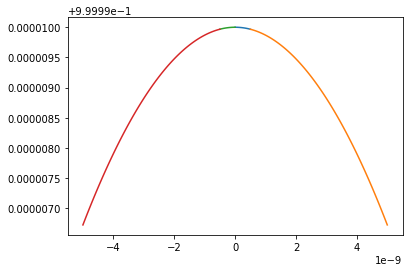

In [356]:
#try with way smaller E to show we still get sinusoidal solution
E=10**10

a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, L)
plt.plot(a1,b1)

a2,b2,c2=RK4_Solver(100, E, 1, b1[-1], c1[-1], f_1, f_3, 10*L, L)
plt.plot(a2,b2)


a3,b3,c3=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, -L)
plt.plot(a3,b3)

a4,b4,c4=RK4_Solver(100, E, 1, b1[-1], -c1[-1], f_1, f_3, -10*L, -L)
plt.plot(a4,b4)

So, we see that any value of $E$ greater than 1 will yield a sinusoid, they just have longer and longer wavelengths. In short, there is no ground state, there are an infinite number of states valid since our well no longer has a finite width. For demonstration purposes, I'll just deal with a random E and find the wavefunction and the probability distribution. I'm obviously not going to be able to normalise any of these since they both go on forever.

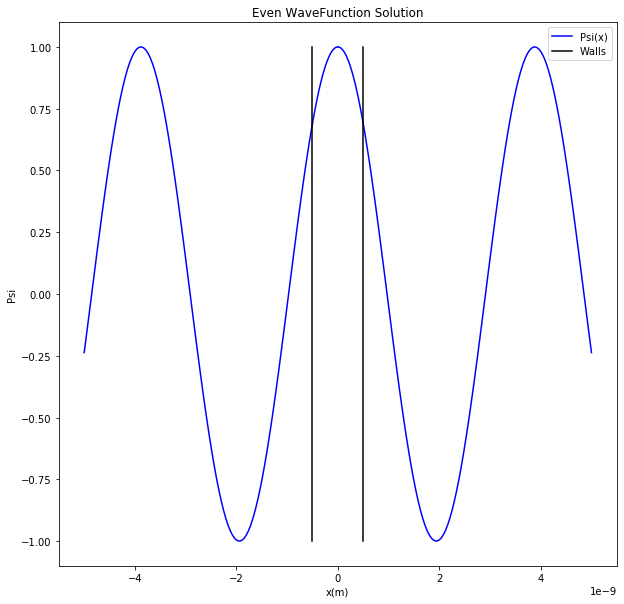

In [363]:
#Here's as good an E as any
E=10**17

fig, ax=plt.subplots(figsize=(10,10)) #standard initialisation

#plotting them the same way I have so many times before...
a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, L)
ax.plot(a1,b1, 'b-', label= "Psi(x)")

a2,b2,c2=RK4_Solver(100, E, 1, b1[-1], c1[-1], f_1, f_3, 10*L, L)
ax.plot(a2,b2, 'b-')

a3,b3,c3=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, -L)
ax.plot(a3,b3, 'b-')

a4,b4,c4=RK4_Solver(100, E, 1, b1[-1], -c1[-1], f_1, f_3, -10*L, -L)
ax.plot(a4,b4, 'b-')

#plot walls
plt.plot(np.ones(100)*L,np.linspace(-1,1,100), 'k-', label= 'Walls')
plt.plot(np.ones(100)*-L,np.linspace(-1,1,100), 'k-')

ax.set_title("Even WaveFunction Solution") #setting a title
ax.set(xlabel="x(m)", ylabel='Psi') #labelling axes

plt.legend()

Let's look at the probability distribution.

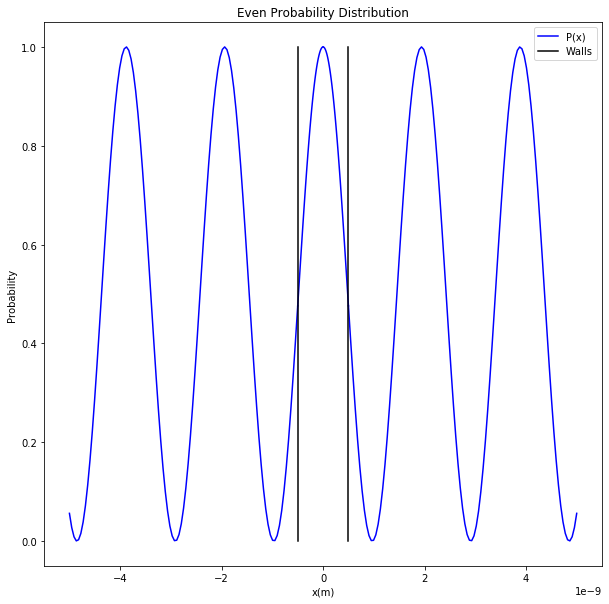

In [377]:
#Here's as good an E as any
E=10**17

fig, ax=plt.subplots(figsize=(10,10)) #standard initialisation

#plotting them the same way I have so many times before...
a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, L)
ax.plot(a1,np.array(b1)**2, 'b-', label= "P(x)")

a2,b2,c2=RK4_Solver(100, E, 1, b1[-1], c1[-1], f_1, f_3, 10*L, L)
ax.plot(a2,np.array(b2)**2, 'b-')

a3,b3,c3=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, -L)
ax.plot(a3,np.array(b3)**2, 'b-')

a4,b4,c4=RK4_Solver(100, E, 1, b1[-1], -c1[-1], f_1, f_3, -10*L, -L)
ax.plot(a4,np.array(b4)**2, 'b-')

#plot walls
plt.plot(np.ones(100)*L,np.linspace(0,1,100), 'k-', label= 'Walls')
plt.plot(np.ones(100)*-L,np.linspace(0,1,100), 'k-')

ax.set_title("Even Probability Distribution") #setting a title
ax.set(xlabel="x(m)", ylabel='Probability') #labelling axes

plt.legend()

This probability distribution isn't normalisable, so I can't do much with it. It goes on forever for all x.

We see that the walls do absolutely nothing. The closest thing to a ground state would be when we let the energy be just greater than 1 i.e. we take $E \to 1$ as our state. However, as I've said, this would look the exact same as what I have above except with a different scale on the x-axis.

We're asked how the energy of the ground state of this new problem compares to that of the infinite potential well. Rolling with $E \to 1$, then we would have that the are the order or $10^{17}$ apart i.e. astronomically different.

The final thing we are asked is to find odd solutions. This is obviously going to have the same problems as our even solutions - there will be infinitely many of them. I shall show this quickly.

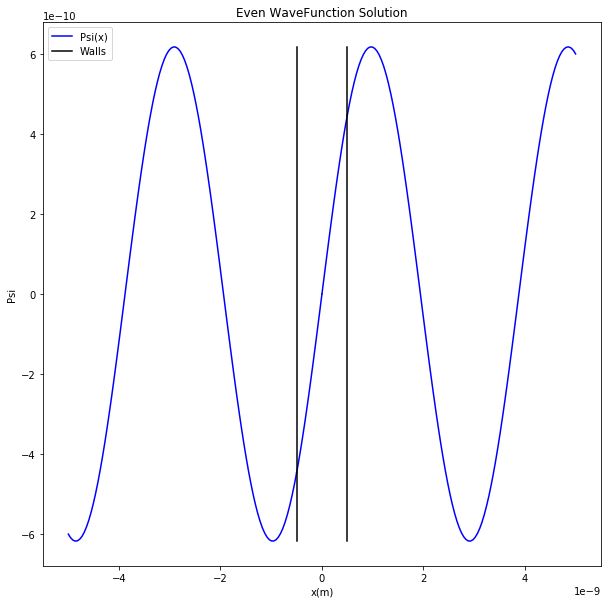

In [375]:
#Here's as good an E as any
E=10**17

fig, ax=plt.subplots(figsize=(10,10)) #standard initialisation

#plotting them the same way I have so many times before...
a1,b1,c1=RK4_Solver(100, E , 0, 0, 1, f_1, f_3, L)
ax.plot(a1,b1, 'b-', label= "Psi(x)")

a2,b2,c2=RK4_Solver(100, E, 1, b1[-1], c1[-1], f_1, f_3, 10*L, L)
ax.plot(a2,b2, 'b-')

a3,b3,c3=RK4_Solver(100, E , 0, 0, 1, f_1, f_3, -L)
ax.plot(a3,b3, 'b-')

a4,b4,c4=RK4_Solver(100, E, 1, b3[-1], c3[-1], f_1, f_3, -10*L, -L)
ax.plot(a4,b4, 'b-')

#plot walls
plt.plot(np.ones(100)*L,np.linspace(-1,1,100)*max(b2), 'k-', label= 'Walls')
plt.plot(np.ones(100)*-L,np.linspace(-1,1,100)*max(b2), 'k-')

ax.set_title("Odd WaveFunction Solution") #setting a title
ax.set(xlabel="x(m)", ylabel='Psi') #labelling axes

plt.legend()

This will suffice to demonstrate that clearly all the odd solutions also behave much as the even ones did. *None* of them are bounded, so the number of bound states that the well can contain is trivially zero.

If, however, we had a larger $V$ such that we did not get trivial solutions for $E$ less than $V$, we would have a far different problem and there would be a ground even state as well as a number of bounded odd states.

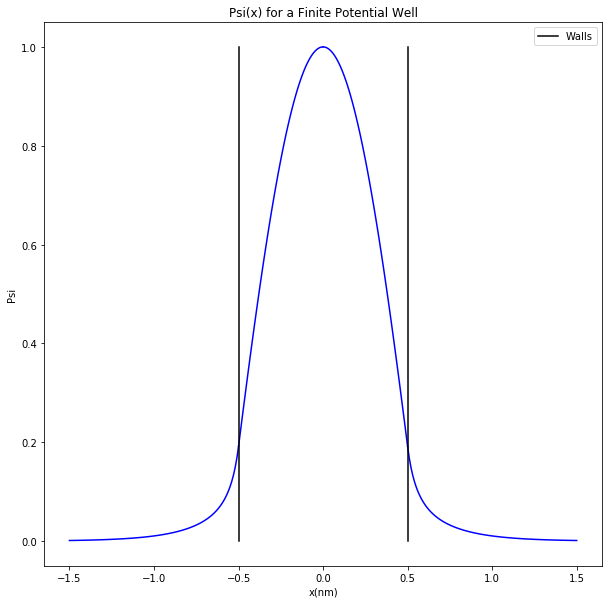

In [8]:
E=0.29 #E=V/2
L=0.5

plt.figure(figsize=(10,10)) #make bigger plot


plt.xlabel("x(nm)") #labelling
plt.ylabel("Psi") #labelling

plt.title("Psi(x) for a Finite Potential Well") #labelling

#as normal for inside well
a1,b1,c1=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, L)
plt.plot(a1,b1, 'b-')

#outside well obtained using new initial conditions
a2,b2,c2=RK4_Solver(100, E, 1, 1/b1[-1], -(b1[-1])**-2*c1[-1], f_1, f_3, 3*L, L)
plt.plot(a2,1/b2, 'b-')

#as normal for inside well
a3,b3,c3=RK4_Solver(100, E , 0, 1, 0, f_1, f_3, -L)
plt.plot(a3,b3, 'b-')

#outside well obtained using new initial conditions
a4,b4,c4=RK4_Solver(100, E, 1, 1/b1[-1], (b1[-1])**-2*c1[-1], f_1, f_3, -3*L, -L)
plt.plot(a4,1/b4, 'b-')

#plot walls
plt.plot(np.ones(100)*L,np.linspace(0,1,100), 'k-', label= 'Walls')
plt.plot(np.ones(100)*-L,np.linspace(0,1,100), 'k-')

plt.legend()

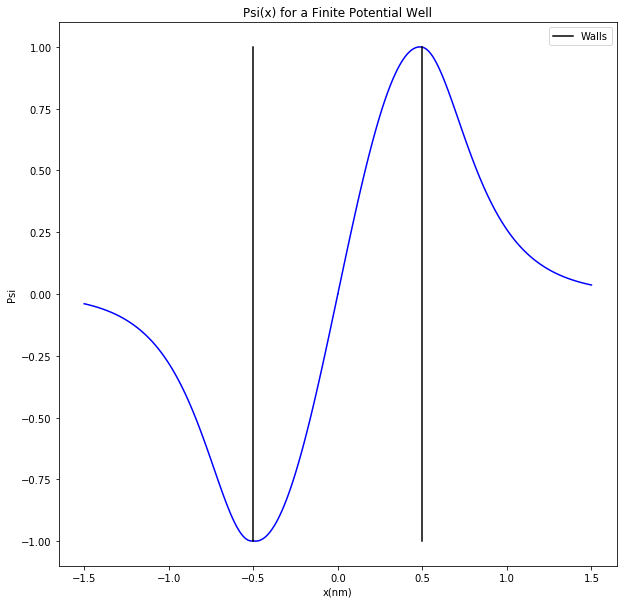

In [24]:
E=0.4 #E=V/2
L=0.5

plt.figure(figsize=(10,10)) #make bigger plot


plt.xlabel("x(nm)") #labelling
plt.ylabel("Psi") #labelling

plt.title("Psi(x) for a Finite Potential Well") #labelling

#as normal for inside well
a1,b1,c1=RK4_Solver(100, E , 0, 0, 1, f_1, f_3, L)
plt.plot(a1,b1*1/max(b1), 'b-')

#outside well obtained using new initial conditions
a2,b2,c2=RK4_Solver(100, E, 1, 1/b1[-1], -(b1[-1])**-2*c1[-1], f_1, f_3, 3*L, L)
plt.plot(a2,1/b2*1/max(b1), 'b-')

#as normal for inside well
a3,b3,c3=RK4_Solver(100, E , 0, 0, 1, f_1, f_3, -L)
plt.plot(a3,b3*1/max(b1), 'b-')

#outside well obtained using new initial conditions
a4,b4,c4=RK4_Solver(100, E, 1, 1/b3[-1], (b1[-1])**-2*c1[-1], f_1, f_3, -3*L, -L)
plt.plot(a4,1/b4*1/max(b1), 'b-')

#plot walls
plt.plot(np.ones(100)*L,np.linspace(-1,1,100), 'k-', label= 'Walls')
plt.plot(np.ones(100)*-L,np.linspace(-1,1,100), 'k-')

plt.legend()